In [24]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Activation

In [2]:
# 데이터 생성  
X = np.array([[0,0],[0,1],[1,0],[1,1]])
Y = np.array([[0],[1],[1],[0]])

In [3]:
X

array([[0, 0],
       [0, 1],
       [1, 0],
       [1, 1]])

In [4]:
Y

array([[0],
       [1],
       [1],
       [0]])

In [127]:
# 모델을 준비한다.
model = Sequential()

# 입력 변수의 개수가 2이고 출력 개수가 1인 y=sigmoid(w1x1+w2x2+b)를 생성한다.
model.add(Dense(5, input_dim=2, activation='sigmoid'))
model.add(Dense(1,  activation='sigmoid'))

# Loss funtion과 Optimizer를 선택한다.
model.compile(loss='mse', optimizer='adam') 

# epochs만큼 반복해서 손실값이 최저가 되도록 모델을 훈련한다.
hist = model.fit(X, Y, epochs=1000, batch_size=100, verbose=0) 

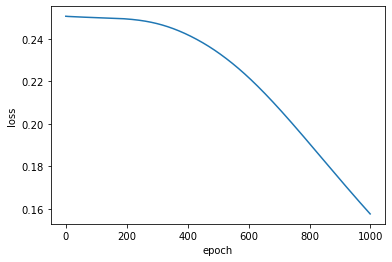

In [128]:
plt.plot(hist.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [129]:
model.get_weights()

[array([[-1.5906684, -1.3802282,  1.6234423,  1.6724541,  2.2602203],
        [ 2.0962505, -1.1783489,  1.6905298, -2.0492535, -1.821235 ]],
       dtype=float32),
 array([ 1.439386 , -0.9484701,  0.4130595, -1.4105364,  1.2226511],
       dtype=float32),
 array([[-1.7760313],
        [-0.8239162],
        [ 2.2071083],
        [ 1.2484072],
        [-1.8393688]], dtype=float32),
 array([0.69455993], dtype=float32)]

In [130]:
import pandas as pd
pd.DataFrame(hist.history['loss']).tail(100)

,0
900,0.173807
901,0.173639
902,0.173471
903,0.173304
904,0.173136
...,...
995,0.158219
996,0.158059
997,0.157900
998,0.157740


In [133]:
result = model.predict(X)
print(X)
print(result)
print(np.where(result>0.5,1,0))

[[0 0]
 [0 1]
 [1 0]
 [1 1]]
[[0.30598632]
 [0.5581923 ]
 [0.66233927]
 [0.4762886 ]]
[[0]
 [1]
 [1]
 [0]]


In [166]:
y_pred=pd.DataFrame(result, columns=['y_pred'])
y_pred2=pd.DataFrame(np.where(result>0.5,1,0), columns=['y_pred(Ɵ>0.5)'])
x=pd.DataFrame(X, columns=['x1','x2'])
Y_real=pd.DataFrame(Y, columns=['y'])
pd.DataFrame(pd.concat([x,Y_real,y_pred,y_pred2], axis=1))

,x1,x2,y,y_pred,y_pred(Ɵ>0.5)
0,0,0,0,0.305986,0
1,0,1,1,0.558192,1
2,1,0,1,0.662339,1
3,1,1,0,0.476289,0


In [158]:
pd.DataFrame(X, columns=['x1','x2'])

,x1,x2
0,0,0
1,0,1
2,1,0
3,1,1
